In [2]:
#ECON136 Spring 2023 Final Project, authors: Maya Bedge, Manasa Kumarappan

# imports
import networkx as nx
from networkx.algorithms import bipartite
import numpy as np
import random
import matplotlib.pyplot as plt
np.random.seed(100)

In [302]:
applicant_dict = {}
job_dict = {}
applicant_list = []
job_list = []
num_jobs = 2
num_applicants = 5
for i in range(num_applicants):
    applicant_name = "a" + str(i)
    applicant_list.append(applicant_name)
    vec = np.random.randint(0,10,11) #generating applicant vectors
    applicant_dict[(applicant_name, i)] = vec
for j in range(num_jobs):
    job_name = "j" + str(j)
    job_list.append(job_name)
    vec = np.random.randint(0,10,11) #generating random job vectors
    job_dict[(job_name, j)] = vec


[('a0', 'j0'), ('a1', 'j1')]


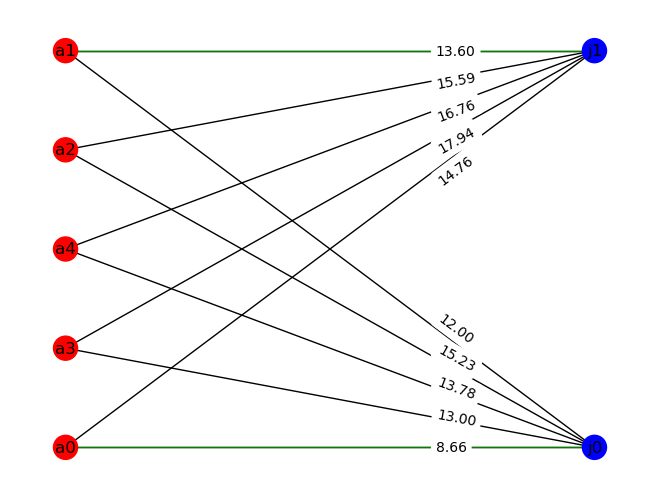

In [303]:
#5 applicants, 2 jobs small example
G = nx.Graph()
G.add_nodes_from(applicant_list, bipartite=0)
G.add_nodes_from(job_list, bipartite=1) #initialize the 2 sets of nodes
for applicant, vec1 in applicant_dict.items():
    for job, vec2 in job_dict.items():
        dist = np.linalg.norm(vec1 - vec2)
        G.add_edge(applicant[0], job[0], weight=dist)
matching = nx.bipartite.minimum_weight_full_matching(G)

matched_edges = [] #from outcome of above line
for key, value in matching.items():
    if key[0] == 'a':
        matched_edges.append((key, value))
print(matched_edges)
        
    

top = nx.bipartite.sets(G)[0]
pos = nx.bipartite_layout(G, top)
nx.draw(G, pos=pos, with_labels=True, node_color=['red','red','red','red','red','blue','blue'])
nx.draw_networkx_edges(G, pos, edgelist=matched_edges, edge_color='g')



#highlight matched edges green
edge_labels = {(u, v): f'{d["weight"]:.2f}' for u, v, d in G.edges(data=True)}
edge_label_pos = nx.draw_networkx_edge_labels(G, pos, edge_labels=edge_labels, label_pos=0.3)

# Adjust label positions to avoid overlaps
for (_, _), label in edge_label_pos.items():
    label.set_horizontalalignment('left')


In [107]:
#determine random assignment in the small example
#first match
random_app = random.randint(0, 4)
random_job = random.randint(0, 1)
lst = [0, 1, 2, 3, 4]
lst.remove(random_app)
second_app = random.choice(lst)
print(random_app)
print(random_job)
print(second_app)

0
1
2


In [24]:
#larger example
applicant_dict = {}
job_dict = {}
applicant_list = []
job_list = []
num_jobs = 25
num_applicants = 75
for i in range(num_applicants):
    applicant_name = "a" + str(i)
    applicant_list.append(applicant_name)
    vec = np.random.randint(1,10,10) #generating applicant vectors
    applicant_dict[(applicant_name, i)] = vec
for j in range(num_jobs):
    job_name = "j" + str(j)
    job_list.append(job_name)
    vec = np.random.randint(1,10,10) #generating random job vectors
    job_dict[(job_name, j)] = vec

In [44]:
G = nx.Graph()
G.add_nodes_from(applicant_list, bipartite=0)
G.add_nodes_from(job_list, bipartite=1) #initialize the 2 sets of nodes
dist_dict = {}
for applicant, vec1 in applicant_dict.items():
    for job, vec2 in job_dict.items():
        dist = np.linalg.norm(vec1 - vec2)
        dist_dict[(applicant[0], job[0])] = dist
        G.add_edge(applicant[0], job[0], weight=dist)
matching = nx.bipartite.minimum_weight_full_matching(G)

sum_weight = 0
for key, value in matching.items():
    if key[0] == 'a': #first half of matchings since each matching is written twice
        sum_weight += dist_dict[(key, value)]
print(sum_weight)
print(matching)


159.91572775035547
{'a36': 'j5', 'a13': 'j16', 'a52': 'j1', 'a7': 'j11', 'a42': 'j6', 'a23': 'j0', 'a65': 'j19', 'a33': 'j21', 'a17': 'j14', 'a46': 'j3', 'a6': 'j9', 'a63': 'j7', 'a8': 'j10', 'a10': 'j2', 'a60': 'j24', 'a49': 'j12', 'a41': 'j8', 'a68': 'j20', 'a15': 'j15', 'a57': 'j22', 'a3': 'j23', 'a53': 'j13', 'a21': 'j18', 'a5': 'j4', 'a27': 'j17', 'j5': 'a36', 'j16': 'a13', 'j1': 'a52', 'j11': 'a7', 'j6': 'a42', 'j0': 'a23', 'j19': 'a65', 'j21': 'a33', 'j14': 'a17', 'j3': 'a46', 'j9': 'a6', 'j7': 'a63', 'j10': 'a8', 'j2': 'a10', 'j24': 'a60', 'j12': 'a49', 'j8': 'a41', 'j20': 'a68', 'j15': 'a15', 'j22': 'a57', 'j23': 'a3', 'j13': 'a53', 'j18': 'a21', 'j4': 'a5', 'j17': 'a27'}


In [42]:
#random comparison without replacement
random_apps = random.sample(range(num_applicants), num_jobs)
random_jobs = random.sample(range(num_jobs), num_jobs)
sum_random_weight = 0
for applicant in random_apps:
    for job in random_jobs:
        sum_random_weight += dist_dict[('a' + str(applicant), 'j' + str(job))]
print(sum_random_weight)
print(random_apps)
print(random_jobs)

7244.28956030421
[54, 15, 70, 58, 74, 13, 18, 67, 7, 21, 32, 35, 66, 12, 47, 8, 36, 73, 52, 24, 27, 60, 41, 14, 30]
[2, 15, 13, 6, 23, 24, 18, 12, 19, 8, 20, 10, 17, 11, 7, 14, 5, 16, 9, 22, 0, 4, 3, 21, 1]


In [72]:
#plotting large simulations
model_x = []
model_y = []

random_x = []
random_y = []

greedy_x = []
greedy_y = []
for i in range(10,401,10): #num of applicants 10 - 150, size 10 step
    applicant_dict = {}
    job_dict = {}
    applicant_list = []
    job_list = []
    num_jobs = int(i/5)
    num_applicants = i

    for i in range(num_applicants):
        applicant_name = "a" + str(i)
        applicant_list.append(applicant_name)
        vec = np.random.randint(0,10,11) #generating applicant vectors
        applicant_dict[(applicant_name, i)] = vec
    for j in range(num_jobs):
        job_name = "j" + str(j)
        job_list.append(job_name)
        vec = np.random.randint(0,10,11) #generating random job vectors
        job_dict[(job_name, j)] = vec
        
    #model calculation of sum weight
    G = nx.Graph()
    G.add_nodes_from(applicant_list, bipartite=0)
    G.add_nodes_from(job_list, bipartite=1) #initialize the 2 sets of nodes
    dist_dict = {}
    for applicant, vec1 in applicant_dict.items():
        for job, vec2 in job_dict.items():
            dist = np.linalg.norm(vec1 - vec2)
            dist_dict[(applicant[0], job[0])] = dist
            G.add_edge(applicant[0], job[0], weight=dist)
    matching = nx.bipartite.minimum_weight_full_matching(G)
    
    sum_weight = 0
    for key, value in matching.items(): #{a0:j1, a2:j0} for example
        if key[0] == 'a': #first half of matchings since each matching is written twice
            sum_weight += dist_dict[(key, value)]
    model_x.append(num_applicants)
    model_y.append(sum_weight)
    
    #random matching calculations
    random_apps = random.sample(range(num_applicants), num_jobs)
    random_jobs = random.sample(range(num_jobs), num_jobs)
    sum_random_weight = 0
    for applicant, job in zip(random_apps, random_jobs):
            sum_random_weight += dist_dict[('a' + str(applicant), 'j' + str(job))]
    random_x.append(num_applicants)
    random_y.append(sum_random_weight)
            
    #greedy implementation
    job_order = job_list
    random.shuffle(job_order)
    dist_dict_copy = dist_dict.copy()

    greedy_sum = 0
    for job in job_order:
        min_dist = float('inf')
        best_key = None
        for key, value in dist_dict_copy.items():
            if key[1] == job:
                if value < min_dist:
                    min_dist = value
                    best_key = key
        greedy_sum += min_dist

        #remove assigned applicant and make a new dict
        keys_to_remove = []
        for key in dist_dict_copy:
            if key[0] == best_key[0] or key[1] == best_key[1]:
                keys_to_remove.append(key)

        for key in keys_to_remove:
            dist_dict_copy.pop(key)
            
    greedy_x.append(num_applicants)
    greedy_y.append(greedy_sum)



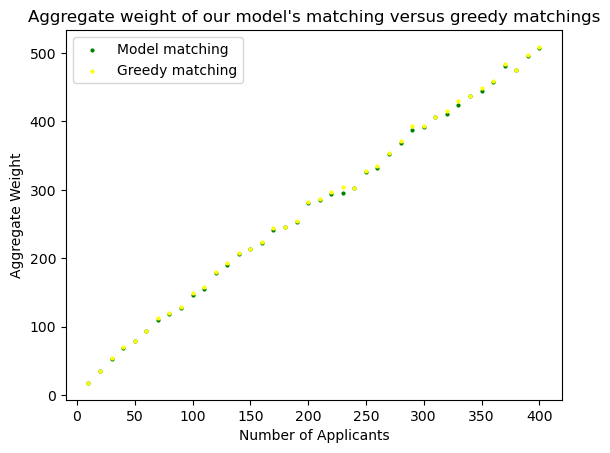

In [85]:
#graph model matching versus greedy matching
#plot on logarithmic scale, becaue random weights increase exponentially
# Plot the model dots
plt.scatter(model_x, model_y, color='green', label='Model matching', s=4)
# Plot the greedy
#plt.scatter(random_x, random_y, color='red', label='Random matching')
plt.scatter(greedy_x, greedy_y, color='yellow', label='Greedy matching', s=4)

# Set the axis labels and title
plt.xlabel('Number of Applicants')
plt.ylabel('Aggregate Weight')
plt.title('Aggregate weight of our model\'s matching versus greedy matchings')
# Add a legend
plt.legend()

# Display the plot
plt.savefig('model_greedy.png', dpi=400)

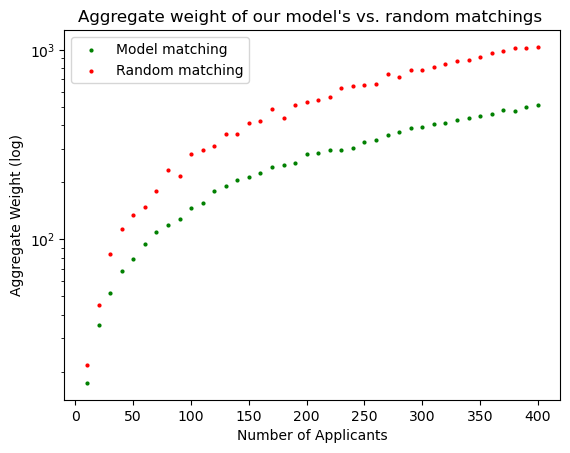

In [87]:
#graph model matching versus greedy matching
#plot on logarithmic scale, becaue random weights increase exponentially
# Plot the model dots
plt.yscale('log')
plt.scatter(model_x, model_y, color='green', label='Model matching', s=4)
# Plot the greedy
#plt.scatter(random_x, random_y, color='red', label='Random matching')
plt.scatter(random_x, random_y, color='red', label='Random matching', s=4)

# Set the axis labels and title

plt.xlabel('Number of Applicants')
plt.ylabel('Aggregate Weight (log)')
plt.title('Aggregate weight of our model\'s vs. random matchings ')
# Add a legend
plt.legend()

# Display the plot
plt.savefig('model_random.png', dpi=500)

In [77]:
#make weight table
print(model_x)
job_num_list = [int(x / 5) for x in model_x]
print(job_num_list)
print([round(y, 2) for y in model_y])
print([round(y, 2) for y in greedy_y])
print([round(y, 2) for y in random_y])

[10, 20, 30, 40, 50, 60, 70, 80, 90, 100, 110, 120, 130, 140, 150, 160, 170, 180, 190, 200, 210, 220, 230, 240, 250, 260, 270, 280, 290, 300, 310, 320, 330, 340, 350, 360, 370, 380, 390, 400]
[2, 4, 6, 8, 10, 12, 14, 16, 18, 20, 22, 24, 26, 28, 30, 32, 34, 36, 38, 40, 42, 44, 46, 48, 50, 52, 54, 56, 58, 60, 62, 64, 66, 68, 70, 72, 74, 76, 78, 80]
[17.44, 35.38, 52.13, 68.12, 78.17, 94.05, 109.29, 118.86, 127.12, 146.53, 154.8, 179.0, 189.61, 206.07, 212.7, 222.34, 241.61, 245.31, 253.63, 281.4, 285.79, 294.22, 296.04, 302.83, 326.41, 332.12, 352.44, 368.31, 388.19, 392.07, 405.82, 411.38, 424.06, 436.95, 444.39, 457.44, 480.74, 475.08, 495.89, 508.2]
[17.44, 35.38, 54.2, 70.11, 79.13, 94.05, 112.33, 120.19, 128.0, 149.29, 158.53, 179.94, 192.34, 207.23, 214.04, 223.77, 244.56, 246.31, 254.01, 282.09, 286.89, 296.7, 303.7, 303.06, 327.69, 335.28, 354.36, 371.94, 393.13, 394.1, 405.86, 415.22, 429.36, 437.59, 448.83, 459.0, 483.47, 475.98, 497.54, 509.09]
[21.69, 44.96, 83.29, 112.45, 13

In [84]:
#stability metrics
num_simulations = 100
stability_list = []
greedy_st_list = []
random_st_list = []
for i in range(10,101,10):
    lst = []
    gr_lst = []
    random_lst = []
    for n in range(num_simulations):
        applicant_dict = {}
        job_dict = {}
        applicant_list = []
        job_list = []
        num_jobs = int(i/5)
        num_applicants = i

        for x in range(num_applicants):
            applicant_name = "a" + str(x)
            applicant_list.append(applicant_name)
            vec = np.random.randint(0,10,11) #generating applicant vectors
            applicant_dict[(applicant_name, x)] = vec
        for y in range(num_jobs):
            job_name = "j" + str(y)
            job_list.append(job_name)
            vec = np.random.randint(0,10,11) #generating random job vectors
            job_dict[(job_name, y)] = vec

        #model calculation
        G = nx.Graph()
        G.add_nodes_from(applicant_list, bipartite=0)
        G.add_nodes_from(job_list, bipartite=1) #initialize the 2 sets of nodes
        dist_dict = {}
        for applicant, vec1 in applicant_dict.items():
            for job, vec2 in job_dict.items():
                dist = np.linalg.norm(vec1 - vec2)
                dist_dict[(applicant[0], job[0])] = dist
                G.add_edge(applicant[0], job[0], weight=dist)
        matching = nx.bipartite.minimum_weight_full_matching(G)
        matched_edges = [] #from outcome of above line
        for key, value in matching.items():
            if key[0] == 'a':
                matched_edges.append((key, value))
        state = 1 #stable
        for tp in matched_edges:
            matched_dist = dist_dict[tp]
            job = tp[1]
            for key, value in dist_dict.items():
                if key[1] == job:
                    if value < matched_dist:
                        state = 0 #unstable
        lst.append(state)
        
        #random 
        random_state = 1
        random_apps = random.sample(range(num_applicants), num_jobs)
        random_jobs = random.sample(range(num_jobs), num_jobs)
        for applicant, job in zip(random_apps, random_jobs):
            matched_dist = dist_dict[('a' + str(applicant), 'j' + str(job))]
            job = 'j' + str(job)
            for key, value in dist_dict.items():
                if key[1] == job:
                    if value < matched_dist:
                        random_state = 0 #unstable  
        random_lst.append(random_state)
        
        #greedy

        job_order = job_list
        random.shuffle(job_order)
        dist_dict_copy = dist_dict.copy()
        greedy_matchings = []
        for job in job_order:
            min_dist = float('inf')
            best_key = None
            for key, value in dist_dict_copy.items():
                if key[1] == job:
                    if value < min_dist:
                        min_dist = value
                        best_key = key
            greedy_matchings.append(best_key)

            #remove assigned applicant and make a new dict
            keys_to_remove = []
            for key in dist_dict_copy:
                if key[0] == best_key[0] or key[1] == best_key[1]:
                    keys_to_remove.append(key)

            for key in keys_to_remove:
                dist_dict_copy.pop(key)

        greedy_state = 1
        for tupl in greedy_matchings:
            matched_dist = dist_dict[tupl]
            job = tupl[1]
            for key, value in dist_dict.items():
                if key[1] == job:
                    if value < matched_dist:
                        greedy_state = 0 #unstable
        gr_lst.append(greedy_state)
        
    stability_list.append(sum(lst)/len(lst))
    random_st_list.append(sum(random_lst)/len(random_lst))
    greedy_st_list.append(sum(gr_lst)/len(gr_lst))
print(stability_list)
print(greedy_st_list)
print(random_st_list)

            

[0.88, 0.7, 0.48, 0.51, 0.34, 0.2, 0.19, 0.11, 0.15, 0.08]
[0.88, 0.7, 0.46, 0.5, 0.34, 0.2, 0.19, 0.1, 0.13, 0.08]
[0.01, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [83]:
print(list(range(10, 101, 10)))


[10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
